In [295]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

In [296]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import reuters

In [297]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

In [298]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [299]:
# Encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [300]:
model = Sequential()
kernel_regularizer = keras.regularizers.l2(0.01)
model.add(Dense(128, activation='relu', input_shape=(10000,), kernel_regularizer=kernel_regularizer))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=kernel_regularizer))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax', kernel_regularizer=kernel_regularizer))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 128)               1280128   
                                                                 
 dropout_60 (Dropout)        (None, 128)               0         
                                                                 
 dense_111 (Dense)           (None, 128)               16512     
                                                                 
 dropout_61 (Dropout)        (None, 128)               0         
                                                                 
 dense_112 (Dense)           (None, 46)                5934      
                                                                 
Total params: 1302574 (4.97 MB)
Trainable params: 1302574 (4.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [301]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

Epoch 1/20


2023-09-27 15:39:44.631331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 5.2322 - accuracy: 0.4791

2023-09-27 15:39:46.174832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 2s 87ms/step - loss: 5.2322 - accuracy: 0.4791 - val_loss: 3.5788 - val_accuracy: 0.5582
Epoch 2/20
15/15 [==============================] - 1s 35ms/step - loss: 3.4058 - accuracy: 0.5947 - val_loss: 3.0696 - val_accuracy: 0.6194
Epoch 3/20
15/15 [==============================] - 1s 41ms/step - loss: 2.9376 - accuracy: 0.6342 - val_loss: 2.6747 - val_accuracy: 0.6717
Epoch 4/20
15/15 [==============================] - 1s 36ms/step - loss: 2.6588 - accuracy: 0.6628 - val_loss: 2.4851 - val_accuracy: 0.6489
Epoch 5/20
15/15 [==============================] - 1s 37ms/step - loss: 2.4288 - accuracy: 0.6711 - val_loss: 2.2929 - val_accuracy: 0.6811
Epoch 6/20
15/15 [==============================] - 1s 35ms/step - loss: 2.2787 - accuracy: 0.6830 - val_loss: 2.1518 - val_accuracy: 0.7040
Epoch 7/20
15/15 [==============================] - 1s 38ms/step - loss: 2.1372 - accuracy: 0.6939 - val_loss: 2.0817 - val_accuracy: 0.6906
Epoch 8/20
15/15 [======

In [ ]:
# Plot training and validation loss
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
marker_train = 'o'
marker_val = 'v'
marker_size = 5
color_train = 'C0'
color_val = 'C1'
axes[0].plot(history.history['loss'], label='Training loss', marker=marker_train, color=color_train, markersize=marker_size)
axes[0].plot(history.history['val_loss'], label='Validation loss', marker=marker_val, color=color_val, markersize=marker_size)
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid()
axes[1].plot(history.history['accuracy'], label='Training accuracy', marker=marker_train, color=color_train, markersize=marker_size)
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy', marker=marker_val, color=color_val, markersize=marker_size)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid()
axes[0].set_xticks(np.arange(0, 20, 1), minor=True)
axes[1].set_xticks(np.arange(0, 20, 1), minor=True)
plt.show()

# Boston housing dataset

In [320]:
from tensorflow.keras.datasets import boston_housing

In [321]:
# Normalize data
def normalize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std

In [316]:
x_train = normalize_data(x_train)
x_test = normalize_data(x_test)

In [317]:
# Build model, add regularization and dropout
kernel_regularizer = keras.regularizers.l2(0.01)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,), kernel_regularizer=kernel_regularizer))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=kernel_regularizer))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 64)                896       
                                                                 
 dropout_64 (Dropout)        (None, 64)                0         
                                                                 
 dense_117 (Dense)           (None, 64)                4160      
                                                                 
 dropout_65 (Dropout)        (None, 64)                0         
                                                                 
 dense_118 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [318]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


2023-09-27 15:41:29.019808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 64ms/step - loss: 576.4018 - mae: 21.9833 - val_loss: 630.2354 - val_mae: 23.3629
Epoch 2/50
 1/11 [=>............................] - ETA: 0s - loss: 487.7349 - mae: 19.9937

2023-09-27 15:41:30.011940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 23ms/step - loss: 556.4633 - mae: 21.7299 - val_loss: 611.6832 - val_mae: 23.0996
Epoch 3/50
11/11 [==============================] - 0s 27ms/step - loss: 537.0232 - mae: 21.5004 - val_loss: 592.4884 - val_mae: 22.8337
Epoch 4/50
11/11 [==============================] - 0s 26ms/step - loss: 510.1842 - mae: 21.0556 - val_loss: 572.4478 - val_mae: 22.5246
Epoch 5/50
11/11 [==============================] - 0s 29ms/step - loss: 498.8007 - mae: 20.9934 - val_loss: 551.4153 - val_mae: 22.1807
Epoch 6/50
11/11 [==============================] - 0s 24ms/step - loss: 489.6023 - mae: 20.7989 - val_loss: 531.7641 - val_mae: 21.8056
Epoch 7/50
11/11 [==============================] - 0s 23ms/step - loss: 463.3408 - mae: 20.2449 - val_loss: 512.6179 - val_mae: 21.4146
Epoch 8/50
11/11 [==============================] - 0s 23ms/step - loss: 449.4128 - mae: 19.9366 - val_loss: 492.2637 - val_mae: 20.9314
Epoch 9/50
11/11 [==============================] - 

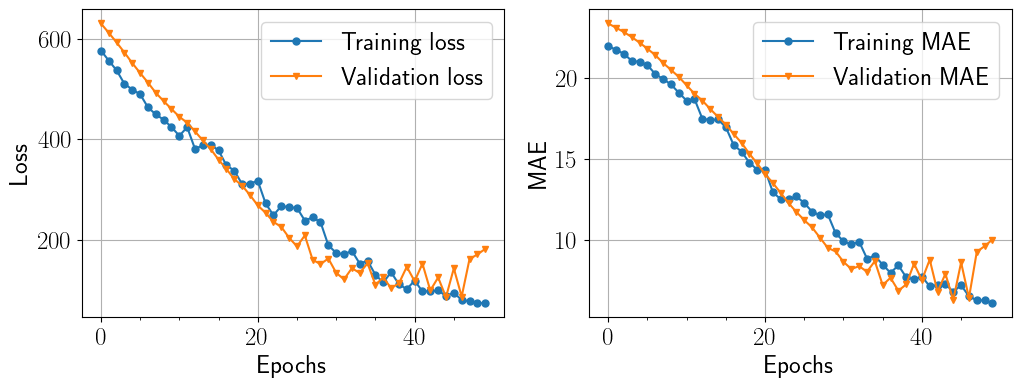

In [323]:
# Plot training and validation loss
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
marker_train = 'o'
marker_val = 'v'
marker_size = 5
color_train = 'C0'
color_val = 'C1'
axes[0].plot(history.history['loss'], label='Training loss', marker=marker_train, color=color_train, markersize=marker_size)
axes[0].plot(history.history['val_loss'], label='Validation loss', marker=marker_val, color=color_val, markersize=marker_size)
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid()
axes[1].plot(history.history['mae'], label='Training MAE', marker=marker_train, color=color_train, markersize=marker_size)
axes[1].plot(history.history['val_mae'], label='Validation MAE', marker=marker_val, color=color_val, markersize=marker_size)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid()
axes[0].set_xticks(np.arange(0, 50, 5), minor=True)
axes[1].set_xticks(np.arange(0, 50, 5), minor=True)
plt.show()